# **DC GAN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dset
root = '/content/drive/MyDrive/Oil Spill Detection for gan'

def get_celeba(params):
    transform = transforms.Compose([
        transforms.Resize(params['imsize']),
        transforms.CenterCrop(params['imsize']),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5),
            (0.5, 0.5, 0.5))])

    dataset = dset.ImageFolder(root=root, transform=transform)

    dataloader = torch.utils.data.DataLoader(dataset,
        batch_size=params['bsize'],
        shuffle=True)

    return dataloader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def weights_init(w):

    classname = w.__class__.__name__
    if classname.find('conv') != -1:
        nn.init.normal_(w.weight.data, 0.0, 0.02)
    elif classname.find('bn') != -1:
        nn.init.normal_(w.weight.data, 1.0, 0.02)
        nn.init.constant_(w.bias.data, 0)

class Generator(nn.Module):
    def __init__(self, params):
        super().__init__()

        self.tconv1 = nn.ConvTranspose2d(params['nz'], params['ngf']*8,
            kernel_size=4, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(params['ngf']*8)

        self.tconv2 = nn.ConvTranspose2d(params['ngf']*8, params['ngf']*4,
            4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(params['ngf']*4)

        self.tconv3 = nn.ConvTranspose2d(params['ngf']*4, params['ngf']*2,
            4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(params['ngf']*2)

        self.tconv4 = nn.ConvTranspose2d(params['ngf']*2, params['ngf'],
            4, 2, 1, bias=False)
        self.bn4 = nn.BatchNorm2d(params['ngf'])

        self.tconv5 = nn.ConvTranspose2d(params['ngf'], params['nc'],
            4, 2, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.bn1(self.tconv1(x)))
        x = F.relu(self.bn2(self.tconv2(x)))
        x = F.relu(self.bn3(self.tconv3(x)))
        x = F.relu(self.bn4(self.tconv4(x)))

        x = F.tanh(self.tconv5(x))

        return x

class Discriminator(nn.Module):
    def __init__(self, params):
        super().__init__()

        self.conv1 = nn.Conv2d(params['nc'], params['ndf'],
            4, 2, 1, bias=False)

        self.conv2 = nn.Conv2d(params['ndf'], params['ndf']*2,
            4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(params['ndf']*2)

        self.conv3 = nn.Conv2d(params['ndf']*2, params['ndf']*4,
            4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(params['ndf']*4)

        self.conv4 = nn.Conv2d(params['ndf']*4, params['ndf']*8,
            4, 2, 1, bias=False)
        self.bn4 = nn.BatchNorm2d(params['ndf']*8)

        self.conv5 = nn.Conv2d(params['ndf']*8, 1, 4, 1, 0, bias=False)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2, True)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2, True)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2, True)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2, True)

        x = F.sigmoid(self.conv5(x))

        return x


Random Seed:  369
cuda:0  will be used.



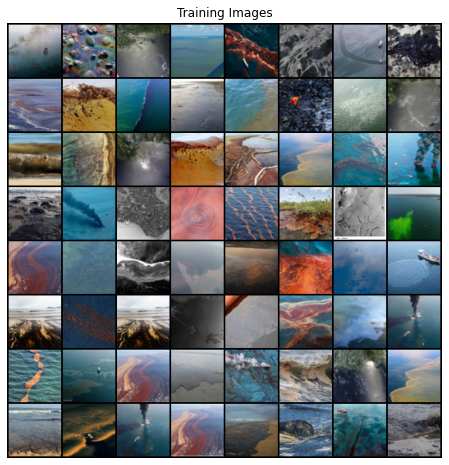

Generator(
  (tconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)
Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Streaming output truncated to the last 5000 lines.
True
[7500/10000][0/1]	Loss_D: 0.0181	Loss_G: 6.2454	D(x): 0.9919	D(G(z)): 0.0098 / 0.0036
True
[7501/10000][0/1]	Loss_D: 0.0196	Loss_G: 6.2672	D(x): 0.9920	D(G(z)): 0.0114 / 0.0036
True
[7502/10000][0/1]	Loss_D: 0.0258	Loss_G: 6.2518	D(x): 0.9914	D(G(z)): 0.0168 / 0.0032
True
[7503/10000][0/1]	Loss_D: 0.0222	Loss_G: 6.4746	D(x): 0.9885	D(G(z)): 0.0104 / 0.0029
True
[7504/10000][0/1]	Loss_D: 0.0179	Loss_G: 6.3755	D(x): 0.9872	D(G(z)): 0.0049 / 0.0029
True
[7505/10000][0/1]	Loss_D: 0.0186	Loss_G: 5.9585	D(x): 0.9907	D(G(z)): 0.0091 / 0.0041
True
[7506/10000][0/1]	Loss_D: 0.0227	Loss_G: 6.0485	D(x): 0.9928	D(G(z)): 0.0152 / 0.0041
True
[7507/10000][0/1]	Loss_D: 0.0155	Loss_G: 6.3872	D(x): 0.9916	D(G(z)): 0.0070 / 0.0028
True
[7508/10000][0/1]	Loss_D: 0.0227	Loss_G: 6.1032	D(x): 0.9918	D(G(z)): 0.0141 / 0.0040
True
[7509/10000][0/1]	Loss_D: 0.0199	Loss_G: 6.2453	D(x): 0.9898	D(G(z)): 0.0095 / 0.0035
True
[7510/10000][0/1]	Loss_D: 0.0211	L

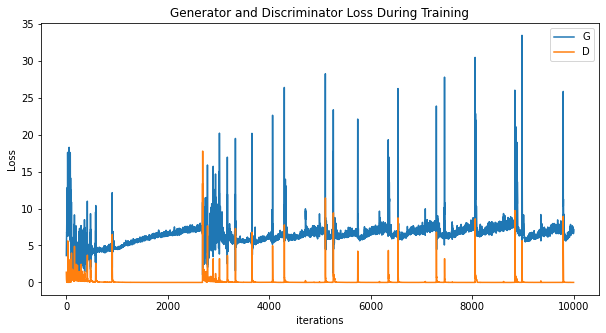

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import os

seed = 369
random.seed(seed)
torch.manual_seed(seed)
print("Random Seed: ", seed)

params = {
    "bsize" : 128,
    'imsize' : 64,
    'nc' : 3,
    'nz' : 100,
    'ngf' : 64,
    'ndf' : 64, 
    'nepochs' : 10000,
    'lr' : 0.0002,
    'beta1' : 0.5,
    'save_epoch' : 1000}

device = torch.device("cuda:0" if(torch.cuda.is_available()) else "cpu")
print(device, " will be used.\n")

dataloader = get_celeba(params)

sample_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(
    sample_batch[0].to(device)[ : 64], padding=2, normalize=True).cpu(), (1, 2, 0)))

plt.show()

netG = Generator(params).to(device)

netG.apply(weights_init)

print(netG)

netD = Discriminator(params).to(device)

netD.apply(weights_init)

print(netD)

criterion = nn.BCELoss()

fixed_noise = torch.randn(64, params['nz'], 1, 1, device=device)

real_label = 1
fake_label = 0

optimizerD = optim.Adam(netD.parameters(), lr=params['lr'], betas=(params['beta1'], 0.999))

optimizerG = optim.Adam(netG.parameters(), lr=params['lr'], betas=(params['beta1'], 0.999))

img_list = []

G_losses = []

D_losses = []

iters = 0

print("Starting Training Loop...")
print("-"*25)

for epoch in range(params['nepochs']):
    for i, data in enumerate(dataloader, 0):

        real_data = data[0].to(device)

        b_size = real_data.size(0)

        netD.zero_grad()

        label = torch.full((b_size, ), real_label, device=device)
        output = netD(real_data).view(-1)
        errD_real = criterion(output.float(), label.float())


        errD_real.backward()
        D_x = output.mean().item()
        

        noise = torch.randn(b_size, params['nz'], 1, 1, device=device)

        fake_data = netG(noise)

        label.fill_(fake_label  )

        output = netD(fake_data.detach()).view(-1)
        errD_fake = criterion(output.float(), label.float())

        errD_fake.backward()
        D_G_z1 = output.mean().item()

        errD = errD_real + errD_fake

        optimizerD.step()

        netG.zero_grad()

        label.fill_(real_label)

        output = netD(fake_data).view(-1)
        errG = criterion(output.float(), label.float())

        errG.backward()

        D_G_z2 = output.mean().item()

        optimizerG.step()


        if i%50 == 0:
            print(torch.cuda.is_available())
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, params['nepochs'], i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))


        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (iters % 100 == 0) or ((epoch == params['nepochs']-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake_data = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake_data, padding=2, normalize=True))

        iters += 1

    os.makedirs('model', exist_ok=True)

    if epoch % params['save_epoch'] == 0:
        torch.save({
            'generator' : netG.state_dict(),
            'discriminator' : netD.state_dict(),
            'optimizerG' : optimizerG.state_dict(),
            'optimizerD' : optimizerD.state_dict(),
            'params' : params
            }, '/content/drive/MyDrive/model/model_epoch_{}.pth'.format(epoch))

torch.save({
            'generator' : netG.state_dict(),
            'discriminator' : netD.state_dict(),
            'optimizerG' : optimizerG.state_dict(),
            'optimizerD' : optimizerD.state_dict(),
            'params' : params
            }, '/content/drive/MyDrive/model/model_final.pth')

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Generator(
  (tconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)
64


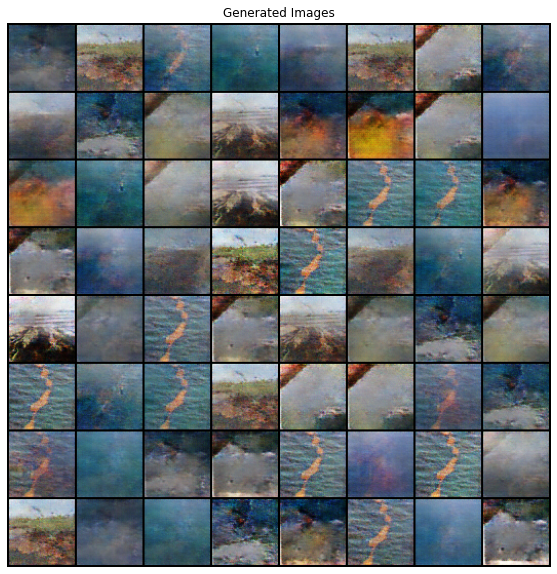

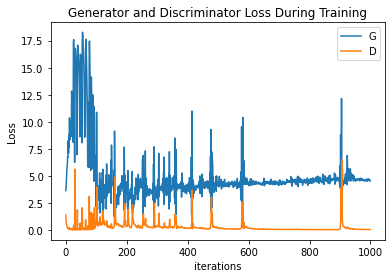

In [ ]:
import torch
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

device = torch.device("cuda:0" if(torch.cuda.is_available()) else "cpu")

load_path = '/content/drive/MyDrive/model/model_final.pth'
num_output = 64

state_dict = torch.load(load_path)

params = state_dict['params']

netG = Generator(params).to(device)

netG.load_state_dict(state_dict['generator'])
print(netG)

print(num_output)

noise = torch.randn(int(num_output), params['nz'], 1, 1, device=device)

with torch.no_grad():

    generated_img = netG(noise).detach().cpu()

plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(generated_img, padding=2, normalize=True), (1,2,0)))

plt.show()

print()


import matplotlib.pyplot as plt

generator_loss = G_losses[:1000]
discriminator_loss = D_losses[:1000]

plt.title("Generator and Discriminator Loss During Training")
# create the plot
plt.plot(generator_loss,label="G")
plt.plot(discriminator_loss,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
import os
import shutil

folder_name = "generated_images"

folder_path = os.path.join(os.getcwd(), folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for i in range(fake_data.shape[0]):

    image_filename = os.path.join(folder_path, "image" + str(i) + ".jpg")

    while os.path.exists(image_filename):
        i += 1
        image_filename = os.path.join(folder_path, "image" + str(i) + ".jpg")

    vutils.save_image(vutils.make_grid(fake_data[i], padding=2, normalize=True), image_filename)

    try:
      shutil.move(image_filename, folder_path)
    except shutil.Error:
      print(f"Error: Destination path '{image_filename}' already exists.")

shutil.make_archive(folder_name, 'zip', folder_path)
files.download(folder_name + '.zip')


Error: Destination path '/content/generated_images/image0.jpg' already exists.
Error: Destination path '/content/generated_images/image1.jpg' already exists.
Error: Destination path '/content/generated_images/image2.jpg' already exists.
Error: Destination path '/content/generated_images/image3.jpg' already exists.
Error: Destination path '/content/generated_images/image4.jpg' already exists.
Error: Destination path '/content/generated_images/image5.jpg' already exists.
Error: Destination path '/content/generated_images/image6.jpg' already exists.
Error: Destination path '/content/generated_images/image7.jpg' already exists.
Error: Destination path '/content/generated_images/image8.jpg' already exists.
Error: Destination path '/content/generated_images/image9.jpg' already exists.
Error: Destination path '/content/generated_images/image10.jpg' already exists.
Error: Destination path '/content/generated_images/image11.jpg' already exists.
Error: Destination path '/content/generated_images

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **ESR GAN**

In [ ]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

!git clone https://github.com/cszn/BSRGAN.git

!rm -r SwinIR

!git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

!wget https://github.com/cszn/KAIR/releases/download/v1.0/BSRGAN.pth -P BSRGAN/model_zoo
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 5.37 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (410/410), done.
/content/Real-ESRGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.9/305.9 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 102.0 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=7c74abb1cd573a0fc9f595e2e8a0747bc74f42c02633371aad3bdad0518ee774
  Stored in directory: /root/.cache/pip/whee

In [ ]:
import os
import glob
from google.colab import files
import shutil
print(' Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.\n Note2: You may need Chrome to enable file uploading!\n Note3: If out-of-memory, set test_patch_wise = True.\n')

test_patch_wise = False

!rm -r BSRGAN/testsets/RealSRSet
upload_folder = 'BSRGAN/testsets/RealSRSet'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

 Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.
 Note2: You may need Chrome to enable file uploading!
 Note3: If out-of-memory, set test_patch_wise = True.



Saving image1000.jpg to image1000.jpg
move image1000.jpg to BSRGAN/testsets/RealSRSet/image1000.jpg


In [ ]:
!rm -r results
if not test_patch_wise:
  %cd BSRGAN
  !python main_test_bsrgan.py
  %cd ..
  shutil.move('BSRGAN/testsets/RealSRSet_results_x4', 'results/BSRGAN')

if test_patch_wise:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN --tile 800
else:
  !python inference_realesrgan.py -n RealESRGAN_x4plus --input BSRGAN/testsets/RealSRSet -s 4 --output results/realESRGAN

if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --tile 800
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4
shutil.move('results/swinir_real_sr_x4', 'results/SwinIR')

if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model --tile 640
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model
shutil.move('results/swinir_real_sr_x4_large', 'results/SwinIR_large')
for path in sorted(glob.glob(os.path.join('results/SwinIR_large', '*.png'))):
  os.rename(path, path.replace('SwinIR.png', 'SwinIR_large.png'))

/content/Real-ESRGAN/BSRGAN
LogHandlers setup!
23-03-11 17:07:17.086 :       Model Name : BSRGAN
23-03-11 17:07:17.100 :           GPU ID : 0
[3, 3, 64, 23, 32, 4]
23-03-11 17:07:19.100 :       Input Path : testsets/RealSRSet
23-03-11 17:07:19.100 :      Output Path : testsets/RealSRSet_results_x4
23-03-11 17:07:19.100 : ---1 --> BSRGAN --> x4--> image1000.jpg
/content/Real-ESRGAN
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 261MB/s]
Testing 0 image1000
loading model from experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-d

Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.




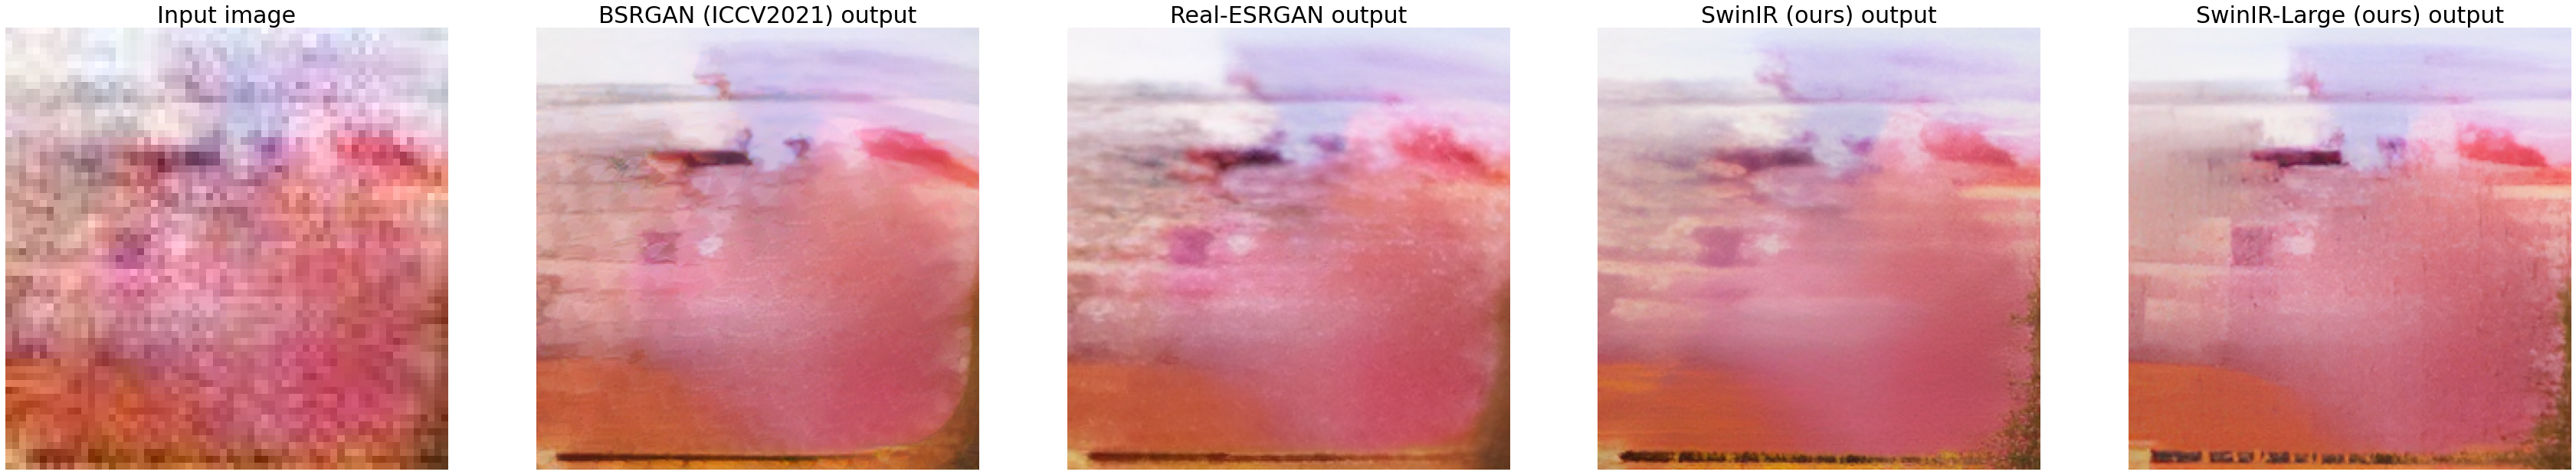

In [ ]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  total_figs = 5
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1) 
  plt.title('Input image', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title('BSRGAN (ICCV2021) output', fontsize=30)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, total_figs, 3)
  plt.title('Real-ESRGAN output', fontsize=30)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, total_figs, 4)
  plt.title('SwinIR (ours) output', fontsize=30)
  ax4.axis('off')
  ax5 = fig.add_subplot(1, total_figs, 5)
  plt.title('SwinIR-Large (ours) output', fontsize=30)
  ax5.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2['BSRGAN'])
  ax3.imshow(img2['realESRGAN'])
  ax4.imshow(img2['SwinIR'])
  ax5.imshow(img2['SwinIR-L'])

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

print('Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.')
if test_patch_wise:
  print('BSRGAN does not support "test_patch_wise" mode for now. Set test_patch_wise = False to see its results.\n')
else:
  print('\n')
input_folder = upload_folder
result_folder = 'results/SwinIR'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = {}
  img_output['SwinIR'] = imread(output_path)
  img_output['SwinIR-L'] = imread(output_path.replace('SwinIR/', 'SwinIR_large/').replace('SwinIR.png', 'SwinIR_large.png'))
  if test_patch_wise:
    img_output['BSRGAN'] = img_output['SwinIR']*0+255
  else:
    img_output['BSRGAN'] = imread(output_path.replace('SwinIR', 'BSRGAN'))
  path = output_path.replace('/SwinIR/', '/realESRGAN/').replace('_SwinIR.png','_out{}'.format(os.path.splitext(input_path)[1]))
  if os.path.exists(path):
    shutil.move(path, path.replace('_out.', '_realESRGAN.'))
  img_output['realESRGAN'] = imread(path.replace('_out.', '_realESRGAN.'))

  display(img_input, img_output)

In [ ]:
# Download the results
zip_filename = 'SwinIR_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

# **CNN**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [ ]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "/content/drive/MyDrive/OilSpill Detection"

CLASS = ['Oil','Water']

In [ ]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR, C)+"*"):
    SRC = img_path

    shutil.copy(SRC, DEST)

**MODEL BUILDING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X)
model = Model(base_model.input, X)
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center = True, 
                                   rotation_range = 0.4, 
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function = preprocess_input,
                                   zoom_range=0.4,
                                   shear_range = 0.4)
'''
train_data = train_datagen.flow_from_directory(directory="/content/Real-ESRGAN/DATASET",
                                               target_size = (256,256),
                                               batch_size = 50)
'''
train_data = train_datagen.flow_from_directory(directory="/content/DATASET",
                                               target_size = (256,256),
                                               batch_size = 50)

Found 2360 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Oil': 0, 'Water': 1}

**VISUALIZING THE DATA**

In [ ]:
t_img, label = train_data.next()

In [ ]:
t_img.shape

(50, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  for idx,img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

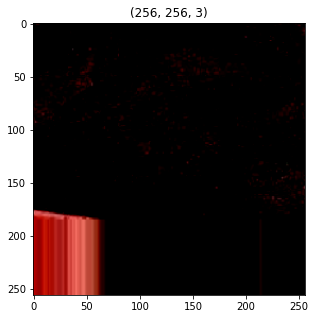

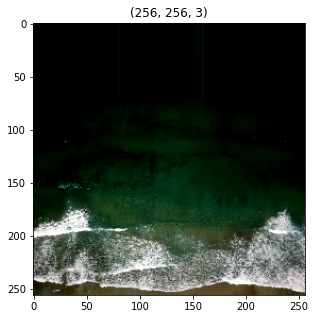

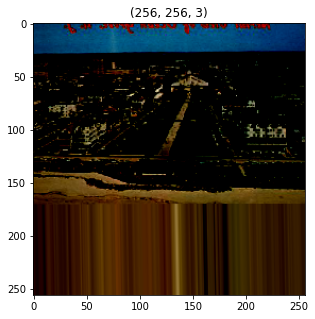

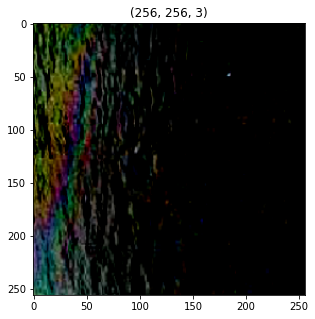

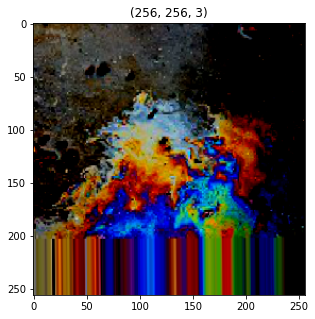

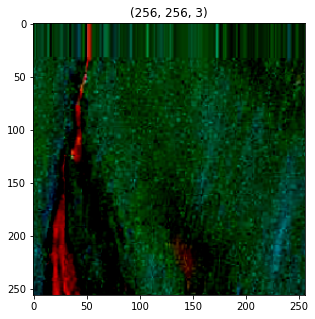

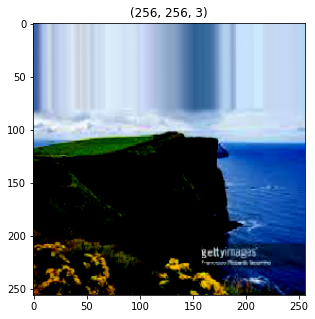

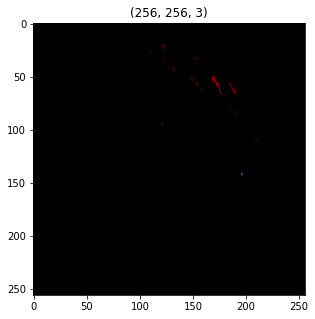

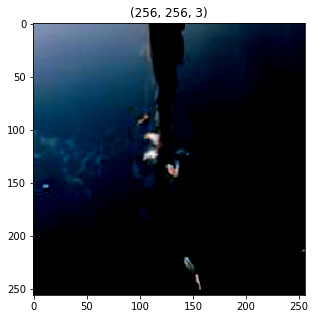

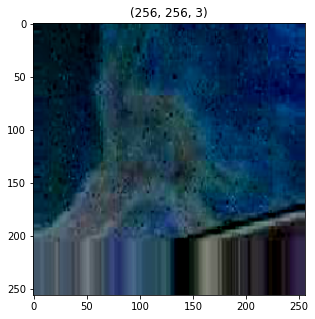

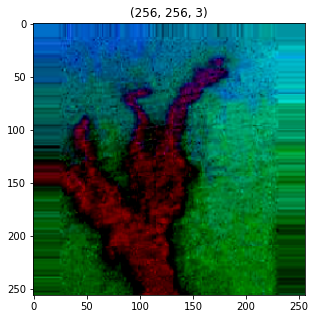

In [ ]:
plotImages(t_img, label)

**MODEL CHECKPOINT**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor = "accuracy",
                     verbose = 1,
                     save_best_only=True)

es = EarlyStopping(monitor="accuracy",
                   min_delta=0.01,
                   patience=5,
                   verbose=1)

cb = [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch=10,
                          epochs=30,
                          callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.0405 - accuracy: 0.6240
Epoch 1: accuracy improved from -inf to 0.62400, saving model to ./best_model.h5
10/10 [==============================] - 29s 1s/step - loss: 2.0405 - accuracy: 0.6240
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.7838 - accuracy: 0.7880
Epoch 2: accuracy improved from 0.62400 to 0.78800, saving model to ./best_model.h5
10/10 [==============================] - 18s 2s/step - loss: 0.7838 - accuracy: 0.7880
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.8580
Epoch 3: accuracy improved from 0.78800 to 0.85800, saving model to ./best_model.h5
10/10 [==============================] - 16s 2s/step - loss: 0.4700 - accuracy: 0.8580
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.8520
Epoch 4: accuracy did not improve from 0.85800
10/10 [==============================] - 16s 2s/step - loss: 0.4692

In [ ]:
from keras.models import load_model
#model = load_model("/content/Real-ESRGAN/best_model.h5")
#model = load_model("/content/best_model.h5")
model = load_model("/content/drive/MyDrive/best_model.h5")

In [ ]:
h= his.history
h.keys()

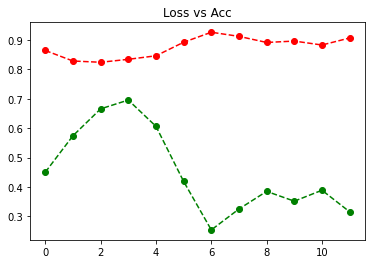

In [ ]:
plt.plot(h['loss'],'go--')
plt.plot(h['accuracy'],'go--', c= "red")

plt.title("Loss vs Acc")
plt.show()

# **TO RUN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import keras

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/best_model.h5")

In [ ]:
def free_boundary(image):
    rows, cols = image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]
    contour = contour.reshape(-1, 2)
    return contour

In [ ]:
from math import e
from google.colab import files
uploaded = files.upload() 
path = next(iter(uploaded))
img = cv2.imread(path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = load_img(path, target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The image is oil")

else:
  print("The image is water")
plt.imshow(rgb_img)
plt.title("input image")
plt.axis = False
plt.show()


RECTANGLE BOUNDARY

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

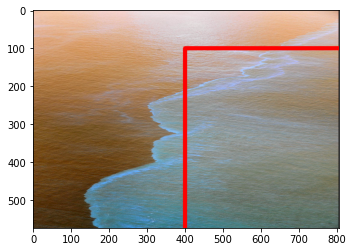

In [ ]:
img1 = cv2.imread(path) #image38
cv2.rectangle(img1, pt1=(400,100), pt2=(1000,700), color=(255,0,0), thickness=10)
plt.imshow(img1)

In [ ]:
#formula for rectangular boundary
volume=45
time=1440
length=600
breadth=100
V=(length*breadth)*volume*time
print(f"The oil spilled across the ocean in the rectangular boundary is {V} Kilo gallon per hour")


The oil spilled across the ocean in the rectangular boundary is 3888000000 Kilo gallon per hour


CIRCULAR BOUNDARY

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

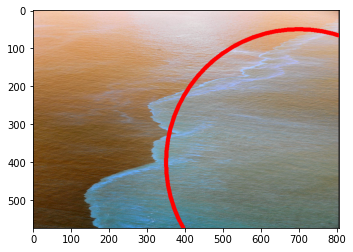

In [ ]:
image1 = cv2.imread(path)
cv2.circle(img=image1, center = (700,400), radius =350, color =(255,0,0), thickness=10)
plt.imshow(image1)

In [ ]:
#formula for circular boundary
volume= 45
pi= 3.14
time= 1440
radius= 700
V=(pi*radius*radius)*volume*time
print(f"The oil spilled across the ocean in circular boundary is {V} Kilo gallon per hour")

The oil spilled across the ocean in circular boundary is 99701280000.0 Kilo gallon per hour


FREE BOUNDARY

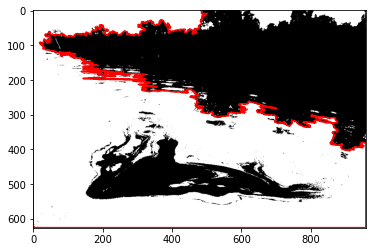

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def free_boundary(image):
    # Get the shape of the image
    rows, cols = image.shape

    # Find the contour of the image using the Marching Squares algorithm
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the longest contour
    contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]

    # Reshape the contour into a 2D array
    contour = contour.reshape(-1, 2)

    # Return the free boundary as a 2D array
    return contour

# Load an image
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Detect the free boundary in the image
free_boundary = free_boundary(image)

# Plot the image and the free boundary
plt.imshow(image, cmap='gray')
plt.plot(free_boundary[:, 0], free_boundary[:, 1], 'r')
plt.show()


# **CONFUSION MATRIX**

In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
expected = ['oil','oil','water','oil','water','water','oil','water','water','water']
predicted = ['oil','oil','oil','water','water','water','oil','oil','oil','oil']
confusion_matrix = metrics.confusion_matrix(expected, predicted)
cf =metrics.confusion_matrix(expected,predicted)
cf

array([[3, 1],
       [4, 2]])

In [ ]:
exp_series = pd.Series(expected)
pred_series = pd.Series(predicted)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted  oil  water  All
Actual                    
oil          3      1    4
water        4      2    6
All          7      3   10

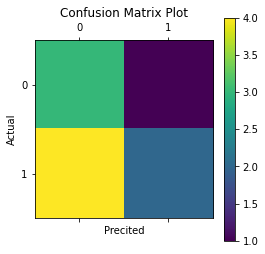

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [ ]:
metrics.confusion_matrix(predicted,expected)

array([[3, 4],
       [1, 2]])

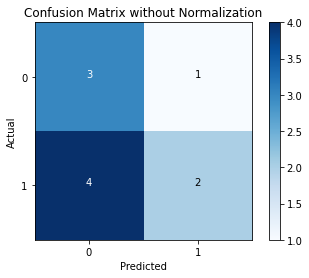

In [ ]:
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(expected))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(cf.shape[0]):
  for j in range(cf.shape[1]):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

**ACCURACY**

In [ ]:
import numpy
import sklearn.metrics

y_true = ['oil','oil','water','oil','water','water','oil','water','water','water']
y_pred = ['oil','oil','oil','water','water','water','oil','oil','oil','oil']

r = sklearn.metrics.confusion_matrix(y_true, y_pred)

r = numpy.flip(r)

acc = (r[0][0] + r[-1][-1]) / numpy.sum(r)
print(acc)

0.5


In [ ]:
acc = sklearn.metrics.accuracy_score(y_true, y_pred)

**PRECISION**

In [ ]:
import sklearn.metrics

y_true = ['oil','oil','water','oil','water','water','oil','water','water','water']
y_pred = ['oil','oil','oil','water','water','water','oil','oil','oil','oil']

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label="oil")
print(precision)

0.42857142857142855


**RECALL**

In [ ]:
import sklearn.metrics

y_true = ['oil','oil','water','oil','water','water','oil','water','water','water']
y_pred = ['oil','oil','oil','water','water','water','oil','oil','oil','oil']

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="oil")
print(recall)

0.75
